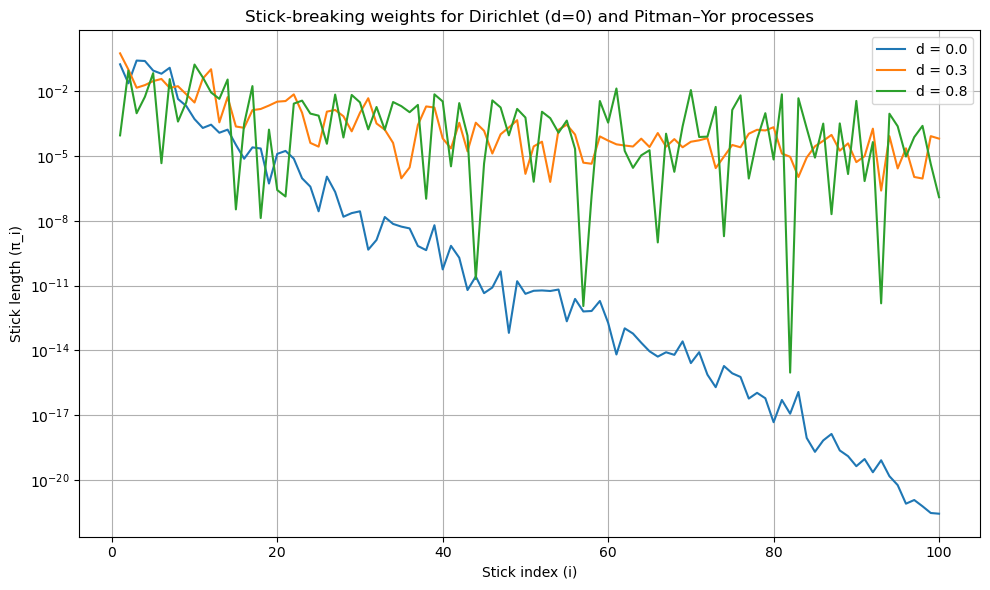

In [276]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import uniform
import collections
from collections import Counter

# Parameters
theta = 2
num_sticks = 100

# Define discount parameters
discounts = [0.0, 0.3, 0.8]  # d = 0.0 is DP; others are PY
stick_breaks = {}

# Generate stick lengths for different discount values
  # for reproducibility
for d in discounts:
    remaining = 1.0
    pis = []
    for i in range(1, num_sticks + 1):
        a = 1 - d
        b = theta + i * d
        v = beta.rvs(a, b)
        pi = v * remaining
        pis.append(pi)
        remaining *= (1 - v)
    stick_breaks[d] = pis

# Plot
plt.figure(figsize=(10, 6))
for d, pis in stick_breaks.items():
    plt.plot(range(1, num_sticks + 1), pis, label=f"d = {d}")

plt.title("Stick-breaking weights for Dirichlet (d=0) and Pitman–Yor processes")
plt.xlabel("Stick index (i)")
plt.ylabel("Stick length (π_i)")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/sk/5wry1hlx7v7__gc97120n0tc0000gn/T/ipykernel_34113/1532309054.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v = float(np.random.beta(a, b,1))


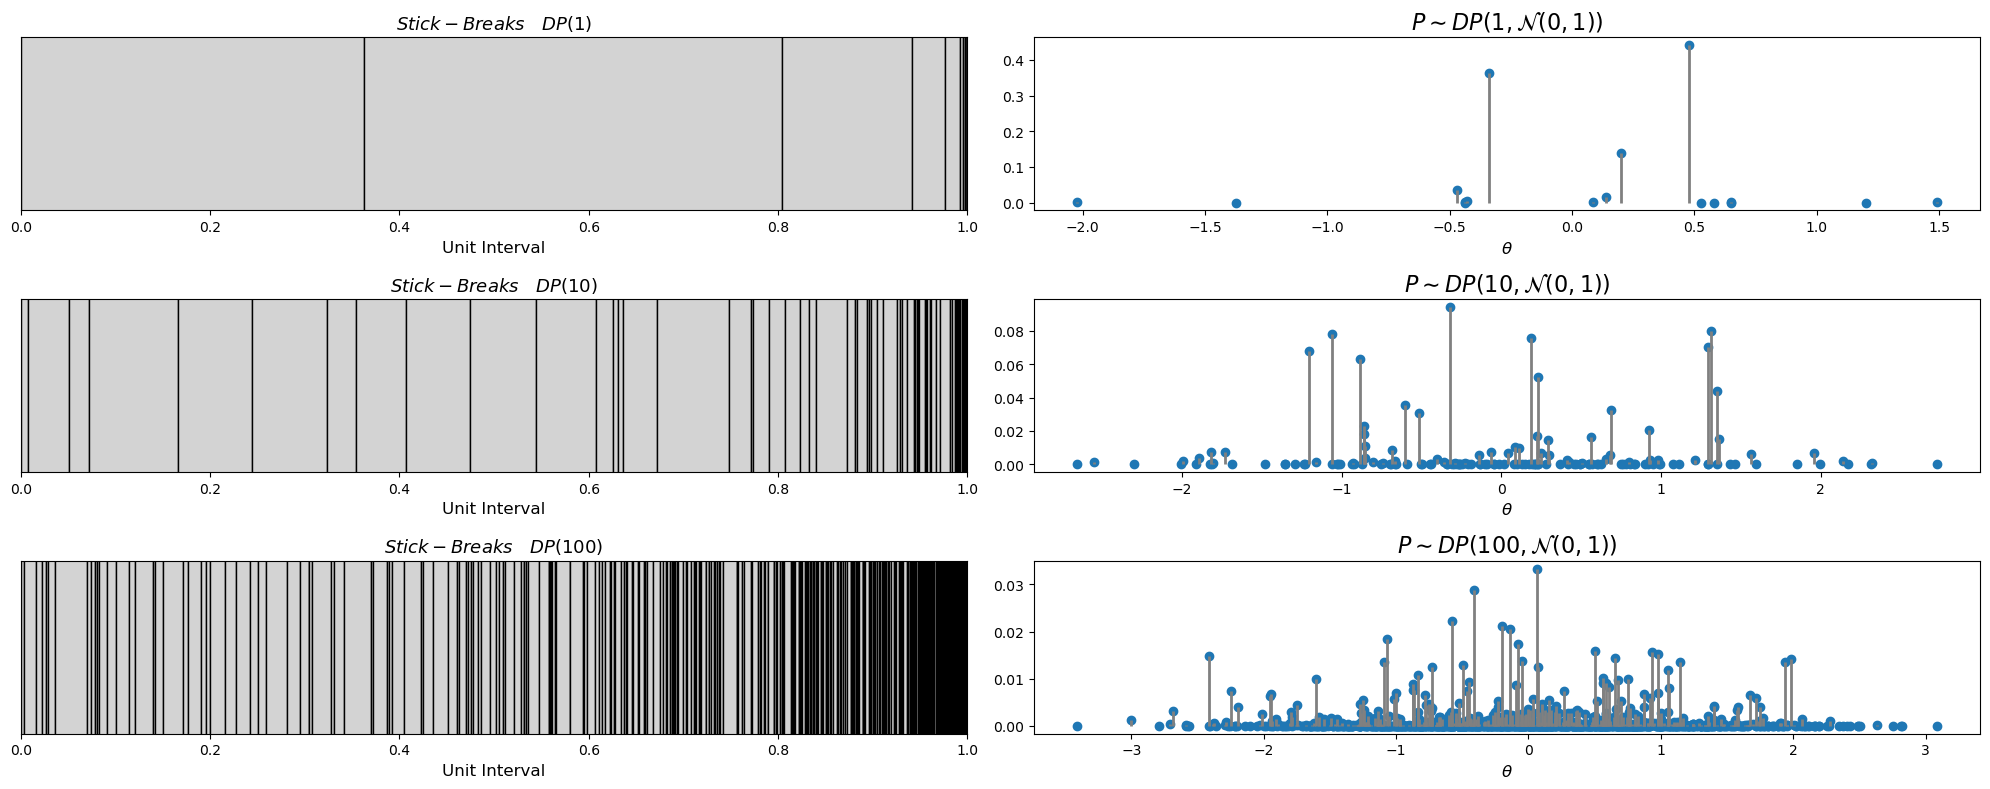

In [317]:

epsilon = 0.000001
mean = 0
d=0

def stick_breaking_process(theta, d, mean, epsilon):
    cumprob = 0
    df = []
    component = 1
    i = 0

    while cumprob < 1 - epsilon:
        a = 1 - d
        b = theta + i * d
        v = float(np.random.beta(a, b,1))
        prob = (1 - cumprob) * v
        cumprob += prob
        
        theta_k = np.random.normal(mean, 1)
        df.append((component, theta_k, prob, cumprob))

        component += 1
        i += 1

    theta_k = np.random.normal(mean, 1)
    df.append((component, theta_k, 1 - cumprob, 1))

    return pd.DataFrame(df, columns=['component', 'theta', 'prob', 'cumprob'])


fig, axes = plt.subplots(3, 2, figsize=(20, 8))

alphas = [1, 10, 100]


for i, alpha in enumerate(alphas):
    DPsample = stick_breaking_process(alpha,d,mean, epsilon)
    probabilities = DPsample['prob']
    
    ax = axes[i, 0]
    start = 0
    for p in probabilities:
        end = start + p
        ax.barh(0, p, left=start, color='lightgray', edgecolor='black', height=1)
        start = end
    
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.1, 0.3)
    ax.set_title(rf'$Stick-Breaks \quad DP({alpha})$', fontsize=13)
    ax.set_xlabel('Unit Interval', fontsize=12)
    ax.set_yticks([])
    ax.set_xticks(np.linspace(0, 1, 6))
    ax.grid(False)
    ax.set_facecolor('white')
    
    ax = axes[i, 1]
    ax.scatter(DPsample['theta'], DPsample['prob'])
    ax.vlines(DPsample['theta'], 0, DPsample['prob'], color='gray', linewidth=2, linestyle='solid')
    ax.set_title(rf'$P \sim DP({alpha},\mathcal{{N}}(0,1))$', fontsize=16)
    ax.set_xlabel(r'$\theta$', fontsize=12)
plt.tight_layout()


/var/folders/sk/5wry1hlx7v7__gc97120n0tc0000gn/T/ipykernel_34113/1532309054.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v = float(np.random.beta(a, b,1))


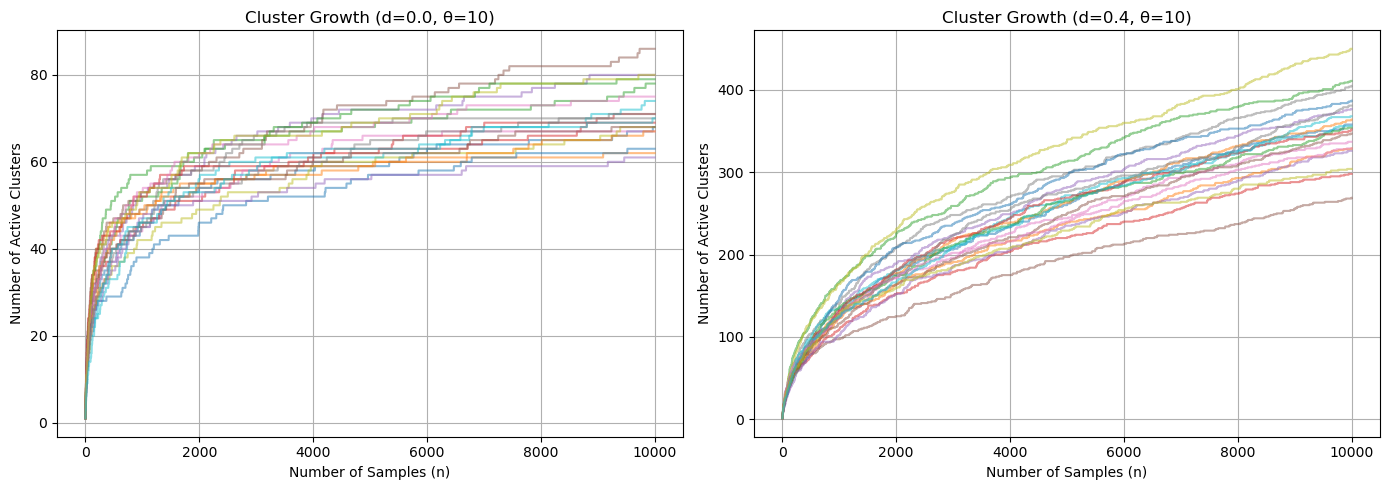

In [ ]:
n_samples = 10000
theta = 10
d_values = [0.0, 0.4]  
n_realizations = 20

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, d in enumerate(d_values):
    for _ in range(n_realizations):
        distr_df = stick_breaking_process(theta, d, mean, epsilon)
        cumprobs = distr_df['cumprob']
        active_clusters = set()
        growth = []

        for n in range(1, n_samples + 1):
            h = uniform.rvs(0, 1)
            for k, cp in enumerate(cumprobs):
                if h <= cp:
                    active_clusters.add(k)
                    break
            growth.append(len(active_clusters))

        
        axes[i].plot(range(1, n_samples + 1), growth, alpha=0.5)

    axes[i].set_xlabel("Number of Samples (n)")
    axes[i].set_ylabel("Number of Active Clusters")
    axes[i].set_title(f"Cluster Growth (d={d}, θ={theta})")
    axes[i].grid(True)

plt.tight_layout()
plt.show()



In [143]:
def stick_breaking_process(theta, d, mean, epsilon):
    cumprob = 0
    df = []
    component = 1
    i = 0

    while cumprob < 1 - epsilon:
        a = 1 - d
        b = theta + i * d
        v = float(np.random.beta(a, b,1))
        prob = (1 - cumprob) * v
        cumprob += prob
        
        theta_k = np.random.normal(mean, 1)
        df.append((component, theta_k, prob, cumprob))

        component += 1
        i += 1

    theta_k = np.random.normal(mean, 1)
    df.append((component, theta_k, 1 - cumprob, 1))

    return pd.DataFrame(df, columns=['component', 'theta', 'prob', 'cumprob'])


/var/folders/sk/5wry1hlx7v7__gc97120n0tc0000gn/T/ipykernel_34113/1532309054.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v = float(np.random.beta(a, b,1))


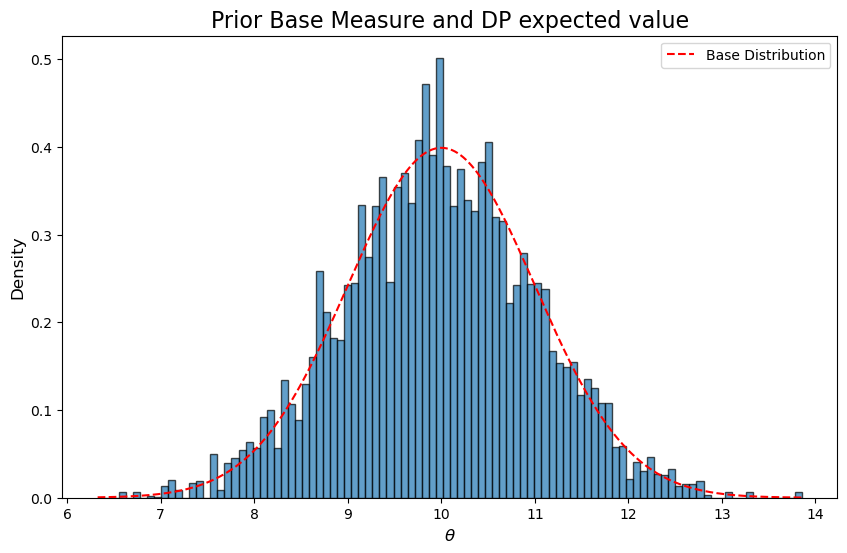

In [330]:

theta = 0.1
d = 0
epsilon = 0.001
mean = 10


DPsample = stick_breaking_process(theta,d, mean, epsilon)

n_runs = 2000

all_thetas_prior = []
all_probs_prior = []

for _ in range(n_runs):
    df = stick_breaking_process(theta,d, 10, epsilon)
    all_thetas_prior.extend(df['theta'])
    all_probs_prior.extend(df['prob'])

n_bins = 100
prior_bins = np.linspace(min(all_thetas_prior), max(all_thetas_prior), n_bins + 1)

plt.figure(figsize=(10, 6))
plt.hist(all_thetas_prior, bins=prior_bins, weights=np.array(all_probs_prior) / n_runs, edgecolor='k', alpha=0.7, density=True)

plt.xlabel(r'$\theta$', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Prior Base Measure and DP expected value', fontsize=16)
x = np.linspace(min(all_thetas_prior), max(all_thetas_prior), 500)
plt.plot(x, norm.pdf(x, loc=10, scale=1), label='Base Distribution', color='red', linestyle='--')
plt.legend()








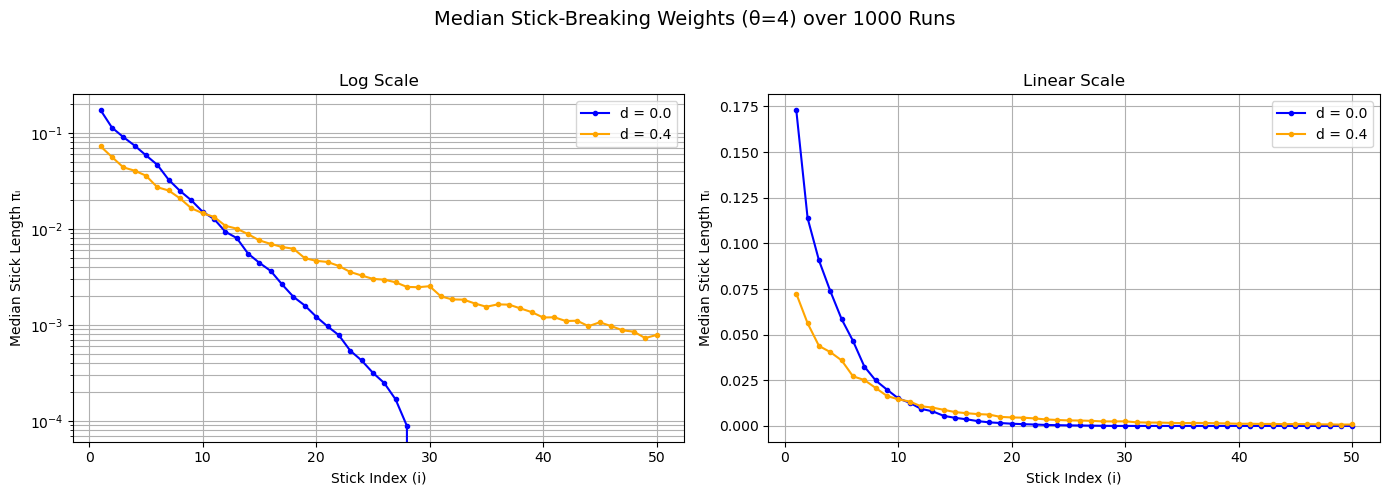

In [145]:
n_runs = 1000
max_length = 50
d_values = [0.0, 0.4]  
colors = ['blue', 'orange']

# Store median weights for each d
median_by_d = {}

for d in d_values:
    all_weights = []

    for _ in range(n_runs):
        prob = 0
        remaining = 1
        i = 0
        weights = []

        while prob < 1 - epsilon and i < max_length:
            a = 1 - d
            b = theta + i * d
            v = beta.rvs(a, b)
            pi = v * remaining
            weights.append(pi)
            remaining -= pi
            prob += pi
            i += 1

        # Pad with zeros
        while len(weights) < max_length:
            weights.append(0.0)

        all_weights.append(weights)

    all_weights = np.array(all_weights)
    median_weights = np.median(all_weights, axis=0)
    median_by_d[d] = median_weights

# Plotting

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

for d, color in zip(d_values, colors):
    x_vals = range(1, max_length + 1)
    y_vals = median_by_d[d]
  
    axes[0].semilogy(x_vals, y_vals, marker='o', markersize=3, linestyle='-', label=f'd = {d}', color=color)

    axes[1].plot(x_vals, y_vals, marker='o', markersize=3, linestyle='-', label=f'd = {d}', color=color)

# Customize both plots
axes[0].set_title("Log Scale")
axes[1].set_title("Linear Scale")

for ax in axes:
    ax.set_xlabel("Stick Index (i)")
    ax.set_ylabel("Median Stick Length πᵢ")
    ax.grid(True, which='both')
    ax.legend()

fig.suptitle(f"Median Stick-Breaking Weights (θ={theta}) over {n_runs} Runs", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/sk/5wry1hlx7v7__gc97120n0tc0000gn/T/ipykernel_34113/1532309054.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v = float(np.random.beta(a, b,1))


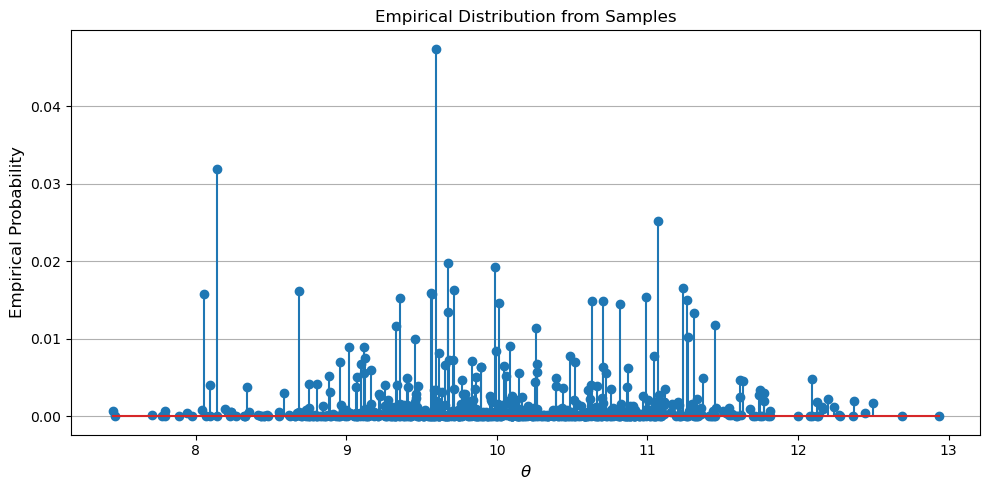

In [309]:

theta = 100
d = 0
mean = 10
epsilon = 0.000001
n = 100000

true_distr = stick_breaking_process(theta,d,mean,epsilon)

thetas =[]

for i in range(n):
    theta = float(np.random.choice(true_distr['theta'], p=true_distr['prob']))
    thetas.append(theta)

thetas = np.array(thetas)
values, counts = np.unique(thetas, return_counts=True)
probabilities = counts / sum(counts)

empirical_distr = pd.DataFrame({'theta':values, 'prob':probabilities})



plt.figure(figsize=(10, 5))
plt.stem(values, probabilities)
plt.xlabel(r'$\theta$', fontsize=12)
plt.ylabel('Empirical Probability', fontsize=12)
plt.title('Empirical Distribution from Samples')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()




def posterior_distribution(prior_alpha, prior_mean, n, empirical_distr, epsilon):
    

    posterior_alpha = prior_alpha + n


    cumprob = 0
    df = []
    component = 1

    while cumprob < 1 - epsilon:

        beta = np.random.beta(1, posterior_alpha, 1)
        prob = float((1 - cumprob) * beta)
        cumprob += prob
        
        u_i = np.random.uniform(0,1)
        
        if u_i <= prior_alpha/(prior_alpha + n):
            
            theta = float(np.random.normal(prior_mean, 1, 1))
        
        else:
            
            theta = float(np.random.choice(empirical_distr['theta'], p=empirical_distr['prob']))
        
        df.append((component, theta, prob, cumprob))
        
        component += 1
    
    u_i = np.random.uniform(0,1)
    
    if u_i <= prior_alpha/(prior_alpha + n):
        
        theta = float(np.random.normal(prior_mean, 1, 1))
    
    else:
        
        theta = float(np.random.choice(empirical_distr['theta'], p=empirical_distr['prob']))
        
    df.append((len(df)+1, theta, 1-cumprob, 1))
    
    df = pd.DataFrame(df, columns=['component', 'theta', 'prob', 'cumprob'])
    
    return df



/var/folders/sk/5wry1hlx7v7__gc97120n0tc0000gn/T/ipykernel_34113/1532309054.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v = float(np.random.beta(a, b,1))


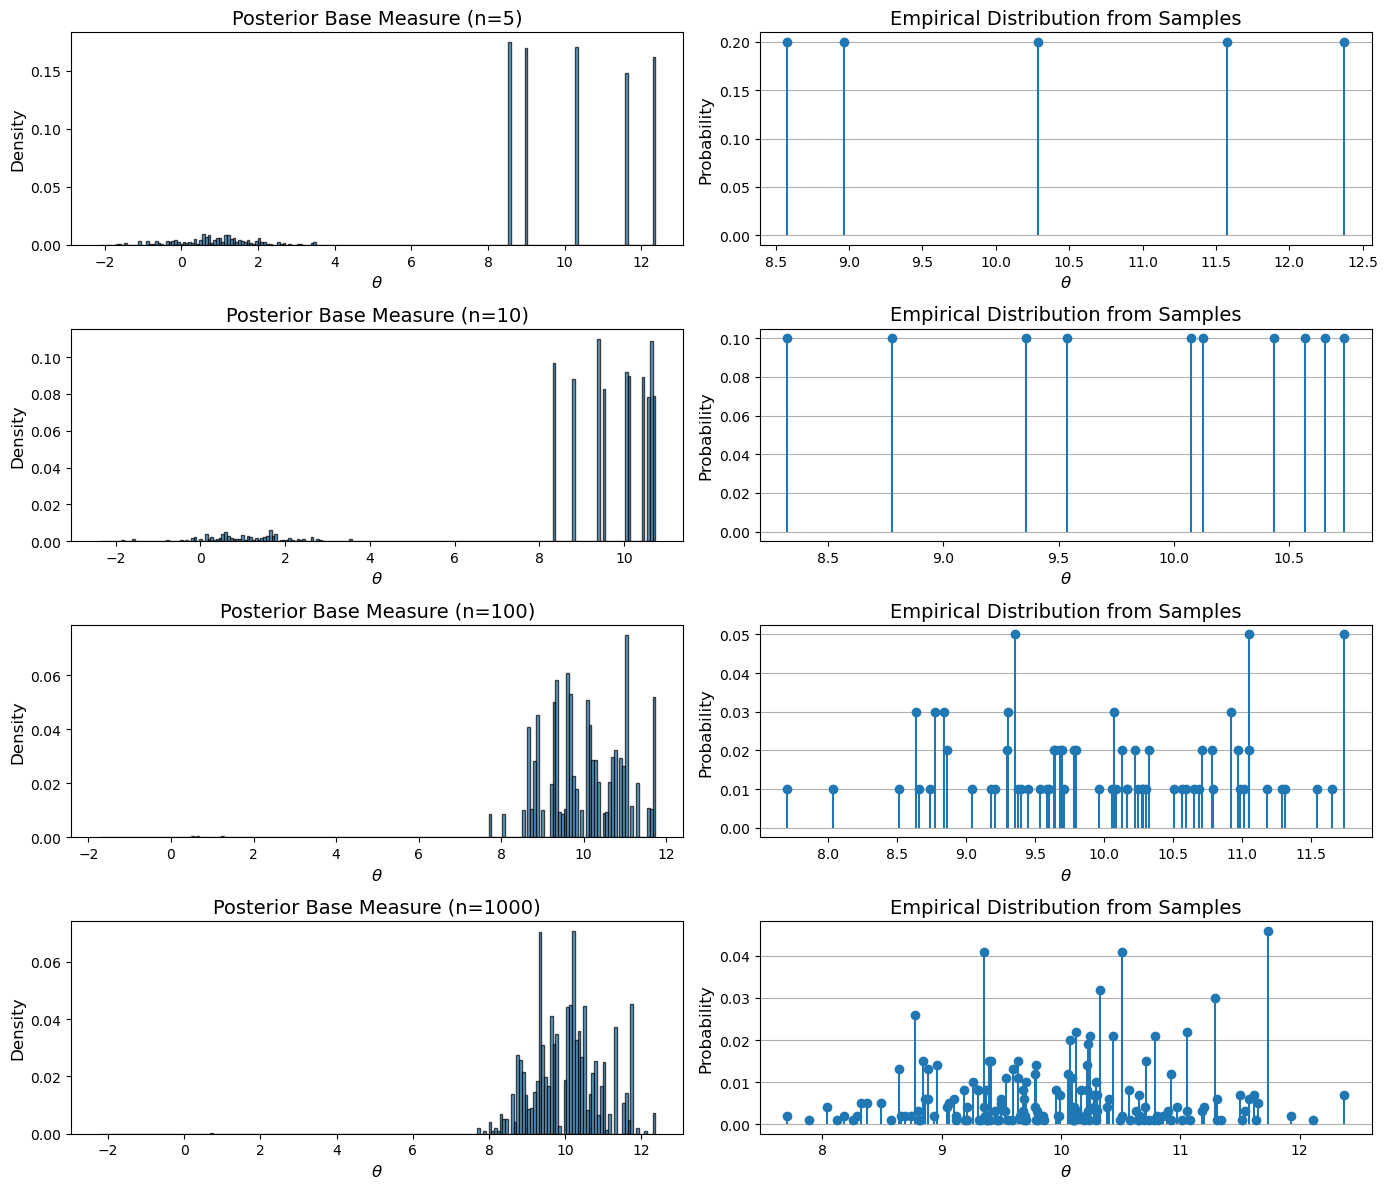

In [328]:




def posterior_distribution(prior_alpha, prior_mean, n, empirical_distr, epsilon):
    posterior_alpha = prior_alpha + n
    cumprob = 0
    df = []
    component = 1

    while cumprob < 1 - epsilon:
        beta = np.random.beta(1, posterior_alpha)
        prob = float((1 - cumprob) * beta)
        cumprob += prob

        u_i = np.random.uniform(0, 1)
        if u_i <= prior_alpha / (prior_alpha + n):
            theta = float(np.random.normal(prior_mean, 1))
        else:
            theta = float(np.random.choice(empirical_distr['theta'], p=empirical_distr['prob']))

        df.append((component, theta, prob, cumprob))
        component += 1

    if cumprob < 1:
        u_i = np.random.uniform(0, 1)
        if u_i <= prior_alpha / (prior_alpha + n):
            theta = float(np.random.normal(prior_mean, 1))
        else:
            theta = float(np.random.choice(empirical_distr['theta'], p=empirical_distr['prob']))
        df.append((component, theta, 1 - cumprob, 1))

    df = pd.DataFrame(df, columns=['component', 'theta', 'prob', 'cumprob'])
    return df

theta = 50
d = 0
mean = 10
epsilon = 0.000001
ns = [5, 10, 100,1000]
n_runs = 100
prior_alpha = 1                                                                                                                                                                                                                                                                                                                                                                                                                       
prior_mean = 1

true_distr = stick_breaking_process(theta, d, mean, epsilon)


fig, axes = plt.subplots(len(ns), 2, figsize=(14, 12))

for row_idx, n in enumerate(ns):
    thetas = []
    for i in range(n):
        sampled_theta = float(np.random.choice(true_distr['theta'], p=true_distr['prob']))
        thetas.append(sampled_theta)

    thetas = np.array(thetas)
    values, counts = np.unique(thetas, return_counts=True)
    probabilities = counts / sum(counts)

    empirical_distr = pd.DataFrame({'theta': values, 'prob': probabilities})

    all_thetas_posterior = []
    all_probs_posterior = []

    for _ in range(n_runs):
        df = posterior_distribution(prior_alpha, prior_mean, n, empirical_distr, epsilon)
        all_thetas_posterior.extend(df['theta'])
        all_probs_posterior.extend(df['prob'])

    n_bins = 200
    posterior_bins = np.linspace(min(all_thetas_posterior), max(all_thetas_posterior), n_bins + 1)
    normalized_weights = np.array(all_probs_posterior) / n_runs
    normalized_weights /= normalized_weights.sum()

    # Left: Posterior Base Measure
    axes[row_idx, 0].hist(all_thetas_posterior, bins=posterior_bins,
                          weights=normalized_weights, edgecolor='k',
                          alpha=0.7, density=False)
    axes[row_idx, 0].set_xlabel(r'$\theta$', fontsize=12)
    axes[row_idx, 0].set_ylabel('Density', fontsize=12)
    axes[row_idx, 0].set_title(f'Posterior Base Measure (n={n})', fontsize=14)

    # Right: Empirical Distribution
    axes[row_idx, 1].stem(values, probabilities, basefmt=" ")
    axes[row_idx, 1].set_xlabel(r'$\theta$', fontsize=12)
    axes[row_idx, 1].set_ylabel('Probability', fontsize=12)
    axes[row_idx, 1].set_title('Empirical Distribution from Samples', fontsize=14)
    axes[row_idx, 1].grid(True, axis='y')

plt.tight_layout()
plt.show()


